<a href="https://colab.research.google.com/github/kauanNas/IA/blob/main/CheckPoint_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

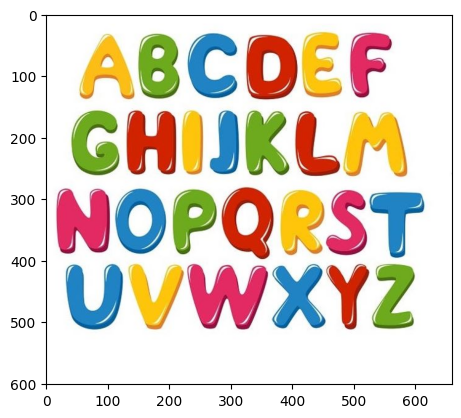

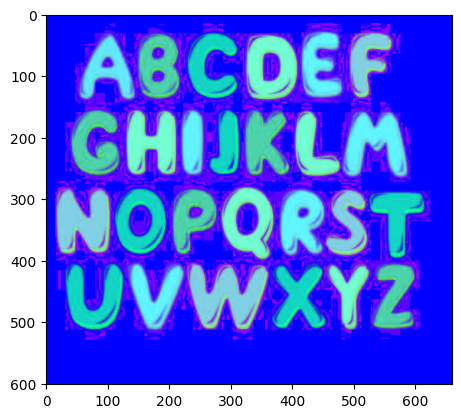

In [8]:
imagem = cv.imread("alfabeto.JPG")
imagem_rgb = cv.cvtColor(imagem, cv.COLOR_BGR2RGB)
imagem_hsv = cv.cvtColor(imagem_rgb, cv.COLOR_BGR2HSV)

plt.imshow(imagem_rgb)
plt.show()
plt.imshow(imagem_hsv)
plt.show()

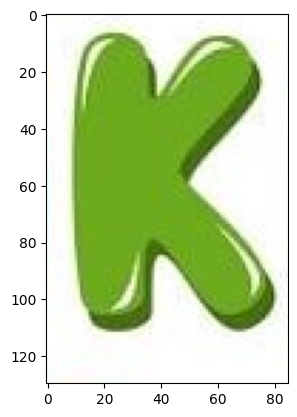

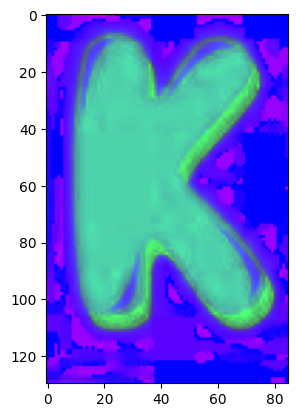

In [21]:
k_rgb = imagem_rgb.copy()
k_rgb = imagem_rgb[150:280, 315:400]

k_hsv = imagem_hsv.copy()
k_hsv = imagem_hsv[150:280, 315:400]

plt.imshow(k_rgb)
plt.show()
plt.imshow(k_hsv)
plt.show()

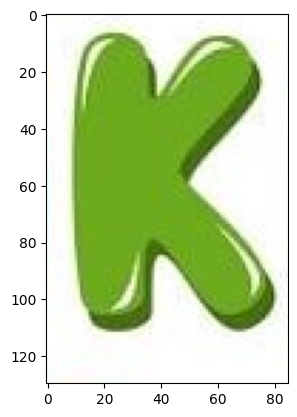

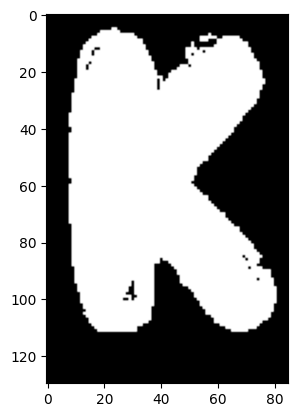

In [57]:
k_lower = np.array([33, 35, 25])
k_upper = np.array([80, 255, 255])


mask_hsv = cv.inRange(k_hsv, k_lower, k_upper)

plt.subplot()
plt.imshow(k_rgb)
plt.show()
plt.subplot()
plt.imshow(mask_hsv, cmap="Greys_r", vmin=0, vmax=255)
plt.show()

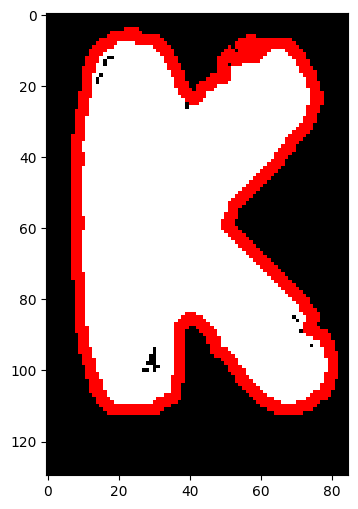

In [141]:
contornos, _ = cv.findContours(mask_hsv, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

mask_rgb = cv.cvtColor(mask_hsv, cv.COLOR_GRAY2RGB)
contornos_img = mask_rgb.copy()

cv.drawContours(contornos_img, contornos, 0, [255, 0, 0], 2);

plt.figure(figsize=(8,6))
plt.imshow(contornos_img);

In [137]:
cnt = contornos[0]

M = cv.moments(cnt)
print( M )

{'m00': 5417.0, 'm10': 211486.0, 'm01': 319041.0, 'm20': 10153216.833333332, 'm11': 12655484.333333332, 'm02': 23310435.5, 'm30': 552603438.0, 'm21': 619763561.3333334, 'm12': 947435434.5, 'm03': 1906103556.5, 'mu20': 1896556.6531598046, 'mu11': 199751.46901728958, 'mu02': 4520116.193926528, 'mu30': 8122438.20036149, 'mu21': 6180077.841238111, 'mu12': 13839610.42643711, 'mu03': 770450.7941615582, 'nu20': 0.0646320824468701, 'nu11': 0.006807259563219094, 'nu02': 0.15403943880535154, 'nu30': 0.0037608787036704405, 'nu21': 0.002861520465505492, 'nu12': 0.0064080630515066595, 'nu03': 0.0003567367227071331}


In [138]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

print("centro de massa na possição: ",cx, cy)

centro de massa na possição:  39 58


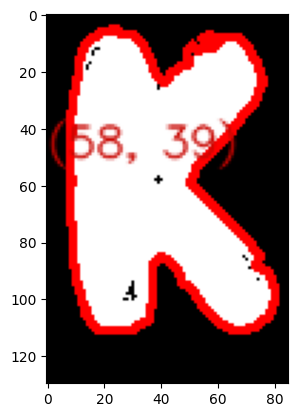

In [139]:
size = 1
color = (0,0,0)

cv.line(contornos_img,(cx - size,cy),(cx + size,cy),color,1)
cv.line(contornos_img,(cx,cy - size),(cx, cy + size),color,1)

font = cv.FONT_HERSHEY_SIMPLEX
text = cy , cx
origem = (0,50)

cv.putText(contornos_img, str(text), origem, font,0.50,(200,5,0),1,cv.LINE_AA)

plt.imshow(contornos_img);